In [1]:
import pandas as pd
import numpy as np 

## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [2]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2021-12-13 16:29:55--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/xvjzaxzz3ysphme/data_000637.txt [segue]
--2021-12-13 16:29:56--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc8c530cbb44ac80fc16603b2359.dl.dropboxusercontent.com/cd/0/inline/Bbx53iP7pAY35vaZJPCeXBXcP3dOzQCur4M7fB7xlVNWFBgLgWEZmoNcUavRo6cL8yMnir86asc4tAXiptbFVQfmiVG60i3uMhjr_CsY4MBiOpyg3xst_qUa7g8emVig64HCSWL8b9gBJ7DQL1lRhoWG/file# [segue]
--2021-12-13 16:29:56--  https://uc8c530cbb44ac80fc16603b2359.dl.dropboxusercontent.com/cd/0/inline/Bbx53iP7pAY35vaZJPCeXBXcP3dOzQCur4M7fB7xlVNWFBgLgWEZ

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [3]:
#1. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. 
#Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

file_name="/home/ilazza/data/data_000637.txt"

dataF = pd.DataFrame(pd.read_csv(file_name))

dataF


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [4]:
N = dataF.shape[0]

print("N rows of the DataFrame ---> " , N)

N rows of the DataFrame --->  1310720


In [5]:
#2. Find out the number of BX in a ORBIT (the value 'x').

x = dataF['BX_COUNTER'].max() - dataF['BX_COUNTER'].min() +1

print("The ORBIT_CNT is increased every ", x ," BX_COUNTER")

The ORBIT_CNT is increased every  3564  BX_COUNTER


In [6]:
#3. Find out how much the data taking lasted. You can either make an estimate based on the 
#fraction of the measurements (rows) you read, or perform this check 
#precisely by reading out the whole dataset.

dataF = dataF.sort_values(['ORBIT_CNT', 'BX_COUNTER', 'TDC_MEAS'], ignore_index=True)

time0 = (dataF['BX_COUNTER'][0])*25 + (dataF['TDC_MEAS'][0])*25/30 + (dataF['ORBIT_CNT'][0])*25*x

timef = (dataF['BX_COUNTER'][N-1])*25 + (dataF['TDC_MEAS'][N-1])*25/30 + (dataF['ORBIT_CNT'][N-1])*25*x

print(" The data taking lasted ", timef - time0 , " ns ")
print("    that is ", (timef - time0)*10**(-9) , " s ")

                  

 The data taking lasted  980416253.3125  ns 
    that is  0.9804162533125  s 


In [7]:
#4. Create a new column with the absolute time 
#in ns (as a combination of the other three columns with timing information).


dataF['ABSOLUTE TIME [ns]'] = dataF['BX_COUNTER']*25 + dataF['TDC_MEAS']*25/30 + dataF['ORBIT_CNT']*25*x

dataF

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME [ns]
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,0,61,3869211171,762,18,3.447467e+14
1310717,1,1,4,3869211171,763,11,3.447467e+14
1310718,1,0,64,3869211171,764,0,3.447467e+14


In [8]:
#5. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

dataF['HEAD'] = np.random.randint(0,2, N)

dataF

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME [ns]
0,0,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,0,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,0,61,3869211171,762,18,3.447467e+14
1310717,1,1,4,3869211171,763,11,3.447467e+14
1310718,0,0,64,3869211171,764,0,3.447467e+14


In [9]:
#6. Create a new DataFrame that contains only the rows with HEAD=1.

dataF2= dataF[dataF['HEAD'] == 1]

dataF2

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME [ns]
1,1,0,124,3869200167,2374,27,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
5,1,0,63,3869200167,2762,4,3.447457e+14
9,1,1,7,3869200167,2785,4,3.447457e+14
...,...,...,...,...,...,...,...
1310711,1,1,35,3869211171,429,4,3.447467e+14
1310713,1,0,64,3869211171,758,18,3.447467e+14
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,0,61,3869211171,762,18,3.447467e+14


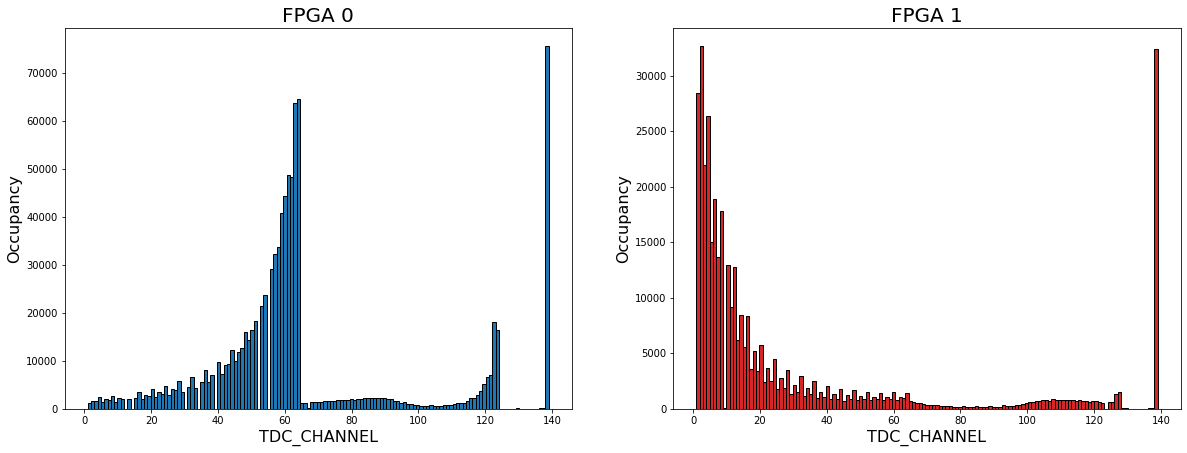

In [26]:
#7. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel


import matplotlib.pyplot as plt
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(20,7))

dataF[ dataF['FPGA'] == 0 ].loc[:,'TDC_CHANNEL'].plot.hist(ax = ax[0] , bins=139 , edgecolor='black')
ax[0].set_title("FPGA 0" , fontsize=20)
ax[0].set_xlabel("TDC_CHANNEL",fontsize=16)
ax[0].set_ylabel("Occupancy",fontsize=16)

dataF[ dataF['FPGA'] == 1 ].loc[:,'TDC_CHANNEL'].plot.hist(ax = ax[1], bins=139 , color='tab:red', edgecolor='black')
ax[1].set_title("FPGA 1" , fontsize=20)
ax[1].set_xlabel("TDC_CHANNEL" ,fontsize=16)
ax[1].set_ylabel("Occupancy",fontsize=16)


plt.show()

In [15]:
#8. Use the groupby method to find out the noisy channels,
#i.e. the TDC channels with most counts (say the top 3)

print(" FPGA 1 ")

group_data1=dataF[dataF['FPGA']==1].groupby('TDC_CHANNEL' , as_index=False).count()
group_data1=group_data1.loc[:,['TDC_CHANNEL','HEAD']]
group_data1.columns = ['TDC_CHANNEL','COUNTS']
group_data1.sort_values(['COUNTS'], ascending=False, inplace=True, ignore_index=True)

group_data1.head(3)


 FPGA 1 


,TDC_CHANNEL,COUNTS
0,2,32669
1,139,32442
2,1,28438


In [12]:
print("\n")
print(" FPGA 0 ")

group_data0=dataF[dataF['FPGA'] == 0].groupby('TDC_CHANNEL' , as_index=False).count()
group_data0=group_data0.loc[:,['TDC_CHANNEL','HEAD']]
group_data0.columns = ['TDC_CHANNEL','COUNTS']
group_data0.sort_values(['COUNTS'], ascending=False, inplace=True, ignore_index=True)
group_data0.head(3)



 FPGA 0 


,TDC_CHANNEL,COUNTS
0,139,75617
1,64,64581
2,63,63724


In [13]:
#9. Count the number of unique orbits. 
#Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

print("Number of unique orbits ---> ", dataF['ORBIT_CNT'].nunique() )
print("\nNumber of unique orbits with at least one measurement from TDC_CH = 139 ---> " , dataF[ dataF['TDC_CHANNEL'] == 139]['ORBIT_CNT'].nunique() )


Number of unique orbits --->  11001

Number of unique orbits with at least one measurement from TDC_CH = 139 --->  10976
